<a href="https://www.kaggle.com/adhang/stroke-prediction-logistic-regression?scriptVersionId=90222336" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Stroke Prediction using Logistic Regression
Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

**Contents**
- [Importing Libraries](#Importing-Libraries)
- [Reading Dataset](#Reading-Dataset)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Preprocessing](#Data-Preprocessing)
- [Logistic Regression](#Logistic-Regression)
- [Conclusion](#Conclusion)

**Dataset**
- `healthcare-dataset-stroke-data.csv` from [Kaggle](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset)

**Objective**
- Predicting whether a patient is likely to get a stroke based on the input parameters like gender, age, various diseases, and smoking status using Logistic Regression

# Importing Libraries

In [1]:
!pip install inflection

In [2]:
# basic
import pandas as pd
import numpy as np

# viz
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

# CamelCase to snake_case format
import inflection

# encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# oversampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# train test split
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LogisticRegression

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Reading Dataset

In [3]:
path = '../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv'

data = pd.read_csv(path)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.rename(columns={'Residence_type':'residence_type'}, inplace=True)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis

## Dataset Overview

In [5]:
data.duplicated().sum()

0

Since there is no duplicated data, I will drop the `id` attribute.

In [6]:
data.drop('id', axis=1, inplace=True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [8]:
column_numerical = ['age', 'avg_glucose_level', 'bmi']

data[column_numerical].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [9]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are some missing values on the `bmi` attribute, I will fill it later.

## Target Distribution

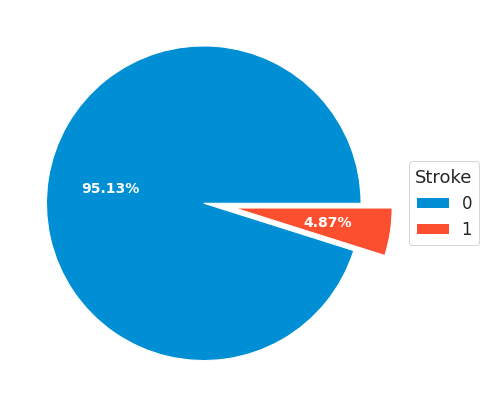

In [10]:
pie_data = data['stroke'].value_counts(normalize=True).values * 100
pie_label = data['stroke'].value_counts(normalize=True).index

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, startangle=0, explode=[0, 0.2],
                                  autopct='%.2f%%', textprops={'color':'w', 'fontsize':14, 'weight':'bold'})

ax.legend(wedges, pie_label,
          title='Stroke',
          loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

This dataset is imbalance. I will do the oversampling later.

## Categorical Data Distribution

### Count Plot

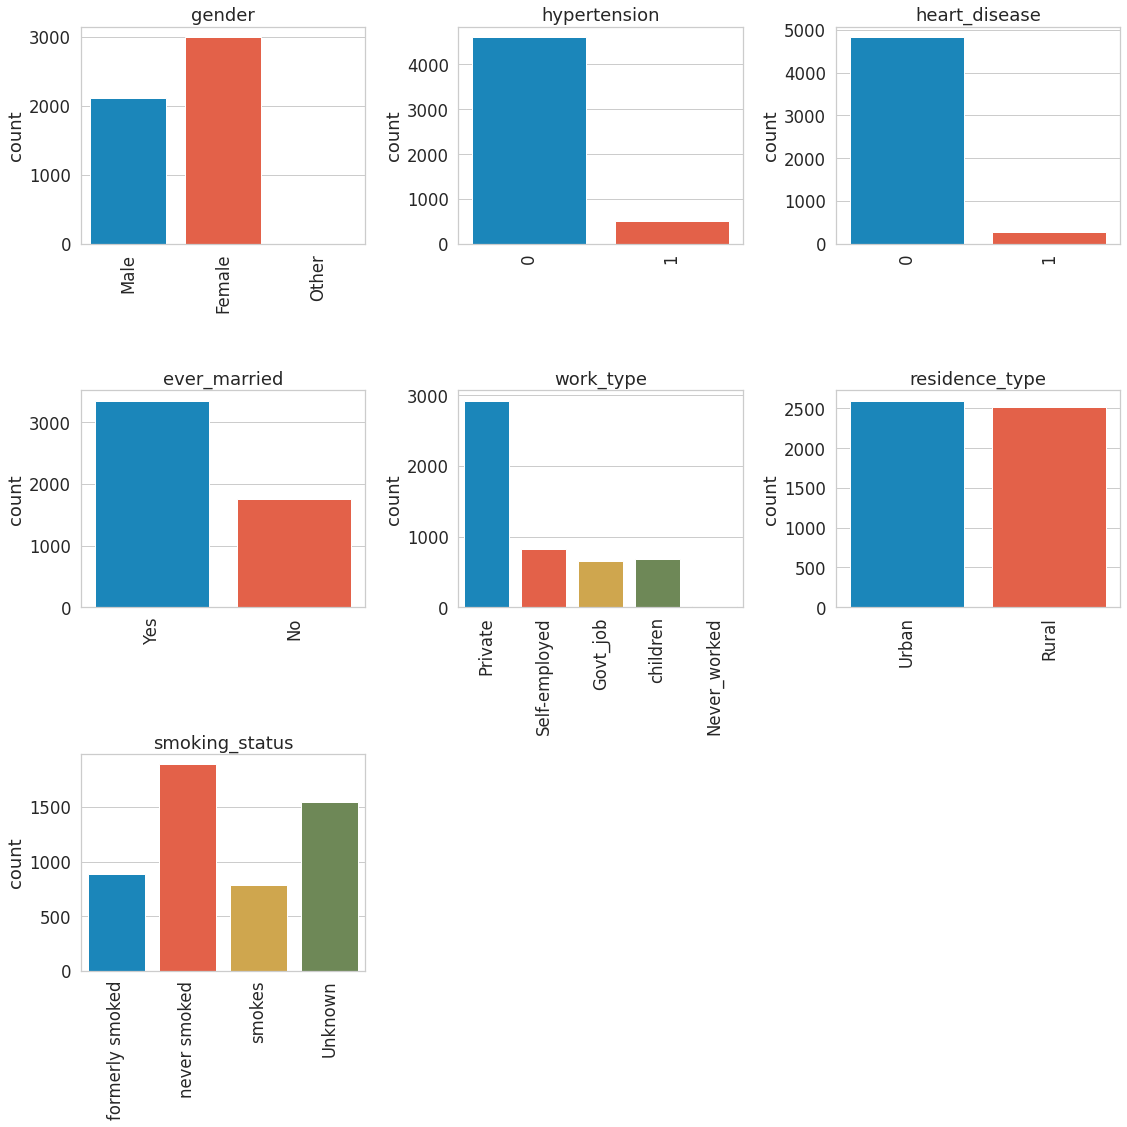

In [11]:
column_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                      'work_type', 'residence_type', 'smoking_status']

fig, ax = plt.subplots(3,3,figsize=(16,16))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_categorical):
  sns.countplot(data=data, x=col, ax=axes_list[i])
  axes_list[i].set_xlabel('')
  axes_list[i].set_title(col)

  plt.setp(axes_list[i].get_xticklabels(), rotation=90)

axes_list[-2].set_visible(False)
axes_list[-1].set_visible(False)

plt.tight_layout()
plt.show()

In [12]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

The `Other` category in the `gender` attribute only appears 1 time. I will change it with the mode of `gender` attribute.

In [13]:
gender_mode = data['gender'].mode().values[0]

data['gender'].replace('Other', gender_mode, inplace=True)
data['gender'].value_counts()

Female    2995
Male      2115
Name: gender, dtype: int64

### Count Plot by Target

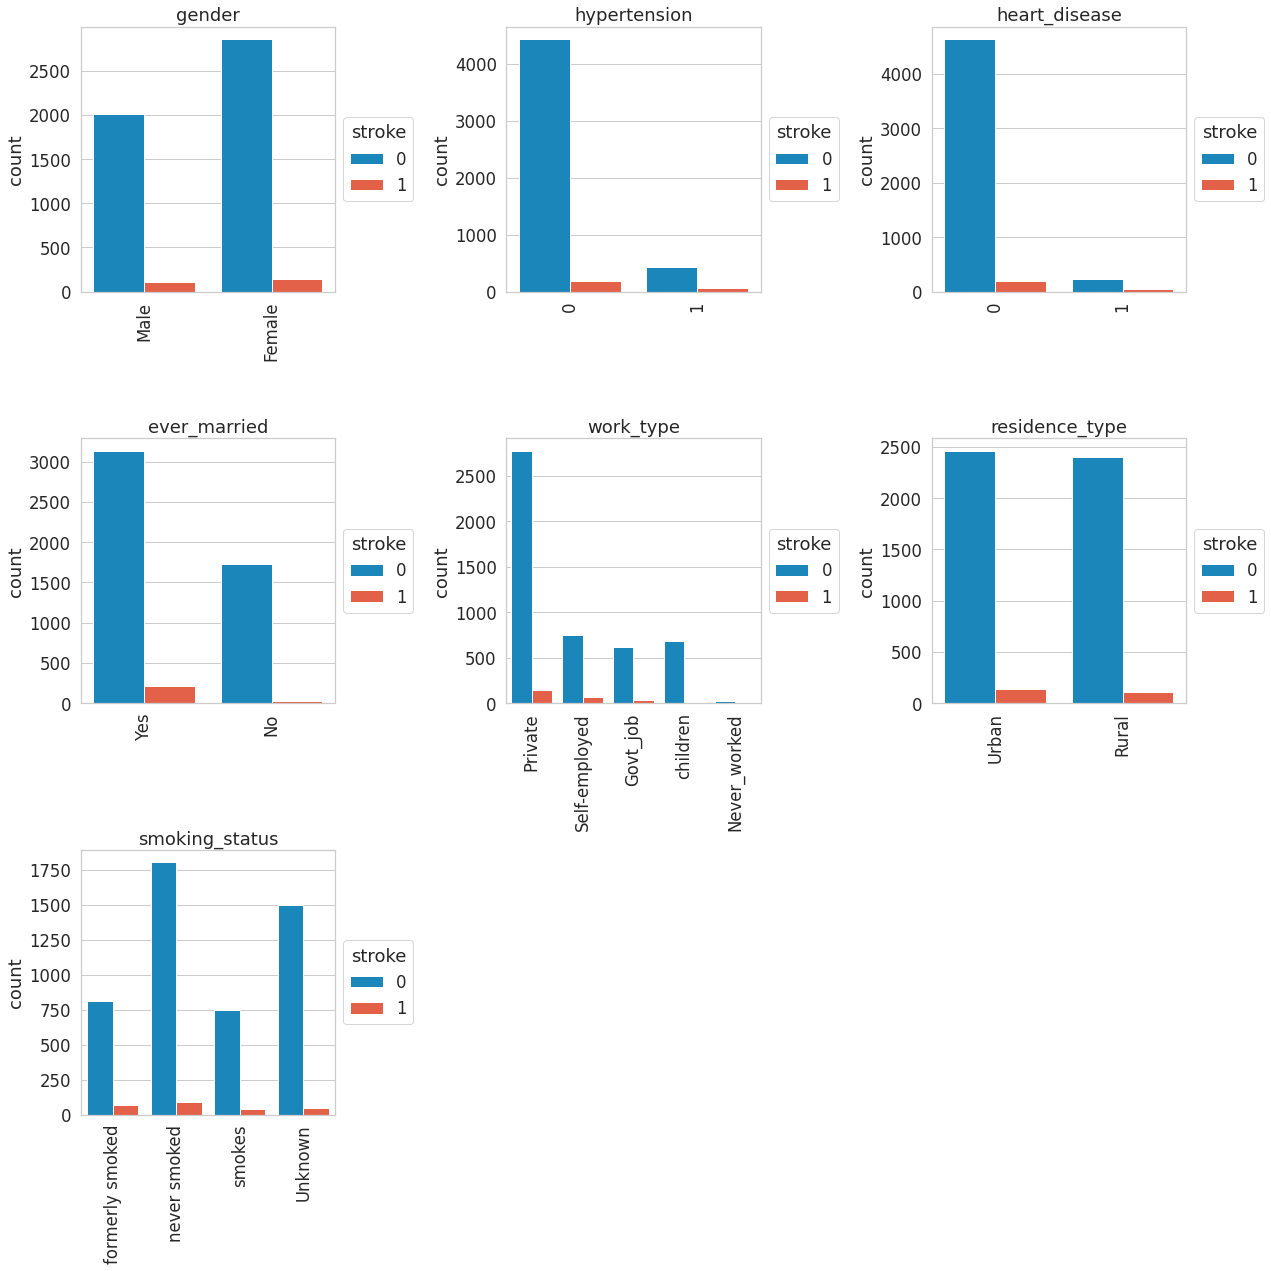

In [14]:
column_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                      'work_type', 'residence_type', 'smoking_status']

fig, ax = plt.subplots(3,3,figsize=(18,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_categorical):
  sns.countplot(data=data, x=col, hue='stroke', ax=axes_list[i])
  axes_list[i].set_xlabel('')
  axes_list[i].set_title(col)
  axes_list[i].legend(title='stroke', loc='center left', bbox_to_anchor=(1, 0.5))

  plt.setp(axes_list[i].get_xticklabels(), rotation=90)
  
axes_list[-2].set_visible(False)
axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()

On the `smoking_status` attribute, there's an `Unknown` category. It's like a null value. I have to change it since it will lead the machine learning to be misjudging: "People with unknown smoking status are more likely to be not a stroke". There are some approaches:
- Data imputation based on the probability:
  - Calculate the probability for each category of having a stroke
  - Set the the `Unknown` to the category that has the highest probability of getting stroke or not getting stroke
- Simply drop this attribute
- Drop rows that has `Unknown`

But I can't promise to use all of these approaches. For now, I will use the first one.

In [15]:
def stacked_bar_plot(data, x, y):
  fig, ax = plt.subplots(figsize=(8,6))

  crosstab = pd.crosstab(index=data[x], columns=data[y], normalize='index')

  crosstab.plot(kind='bar', stacked=True, ax=ax)

  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=y) # 1 = x-right, 0.5 = y-center
  ax.set_ylabel('proportion')
  ax.set_yticks(np.linspace(0,1,11))

  for n, x in enumerate(crosstab.index):
    for (proportion, y_loc) in zip(crosstab.loc[x], crosstab.loc[x].cumsum()):
      ax.text(x=n,
              y=(y_loc - proportion) + (proportion / 2),
              s=f'{np.round(proportion * 100, 1)}%',
              color='white',
              fontsize=14,
              fontweight='bold',
              horizontalalignment='center',
              verticalalignment='center')

  plt.show()

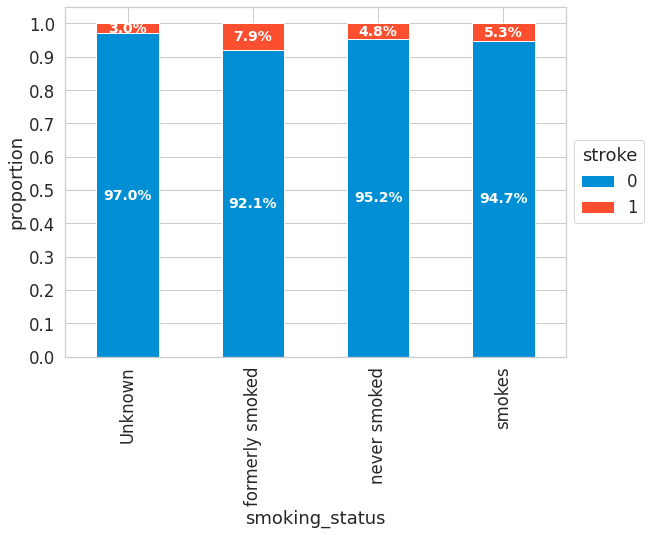

In [16]:
stacked_bar_plot(data, 'smoking_status', 'stroke')

From this plot, we can see that:
- Patient who is never smoked has the highest probability of not getting a stroke
- Patient who is formerly smoked has the highest probability of getting a stroke

Based on these insights, I will do data imputation for the `Unknown` category:
- Set it to `never smoked` for a patient who is not getting a stroke
- Set it to `formerly smoked` for a patient who is getting a stroke

### Replace Unknown Category

In [17]:
data[(data['stroke'] == 1) & (data['smoking_status'] == 'Unknown')].head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
23,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1


In [18]:
mask = (data['stroke'] == 1) & (data['smoking_status'] == 'Unknown')

data.loc[mask, 'smoking_status'] = 'formerly smoked'
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,formerly smoked,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,formerly smoked,1


In [19]:
mask = (data['stroke'] == 0) & (data['smoking_status'] == 'Unknown')

data.loc[mask, 'smoking_status'] = 'never smoked'
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,formerly smoked,1
9,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,formerly smoked,1


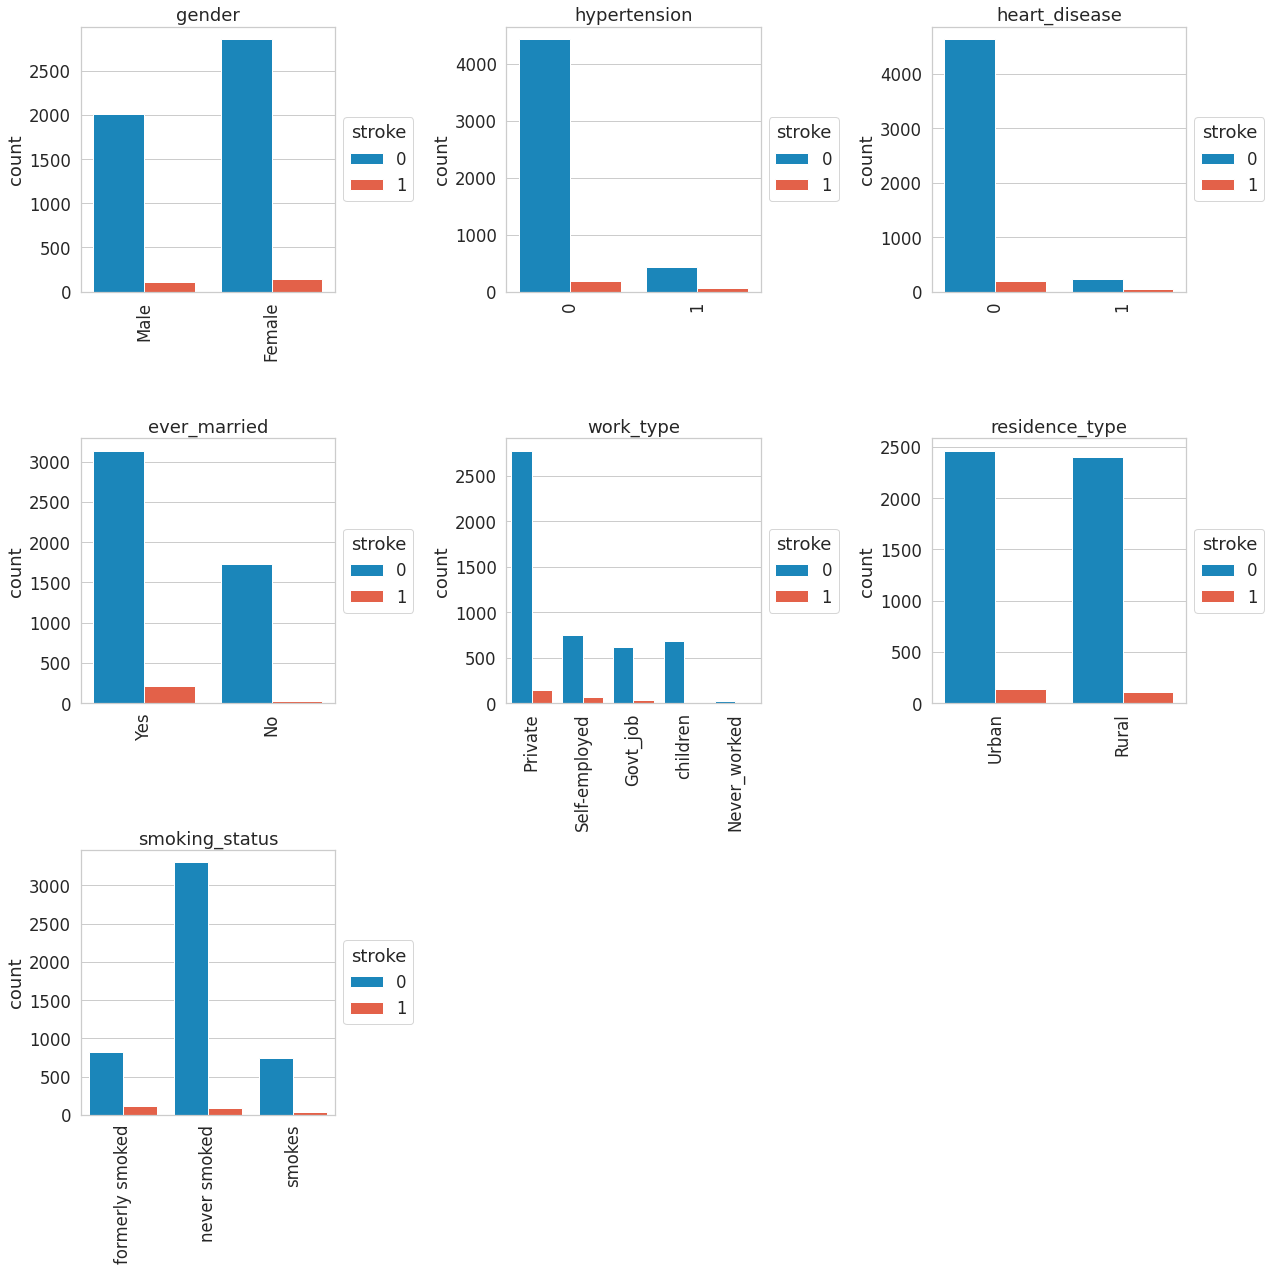

In [20]:
column_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                      'work_type', 'residence_type', 'smoking_status']

fig, ax = plt.subplots(3,3,figsize=(18,18))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_categorical):
  sns.countplot(data=data, x=col, hue='stroke', ax=axes_list[i])
  axes_list[i].set_xlabel('')
  axes_list[i].set_title(col)
  axes_list[i].legend(title='stroke', loc='center left', bbox_to_anchor=(1, 0.5))

  plt.setp(axes_list[i].get_xticklabels(), rotation=90)
  

axes_list[-2].set_visible(False)
axes_list[-1].set_visible(False)
plt.tight_layout()
plt.show()

## Numerical Data Distribution

### Box Plot

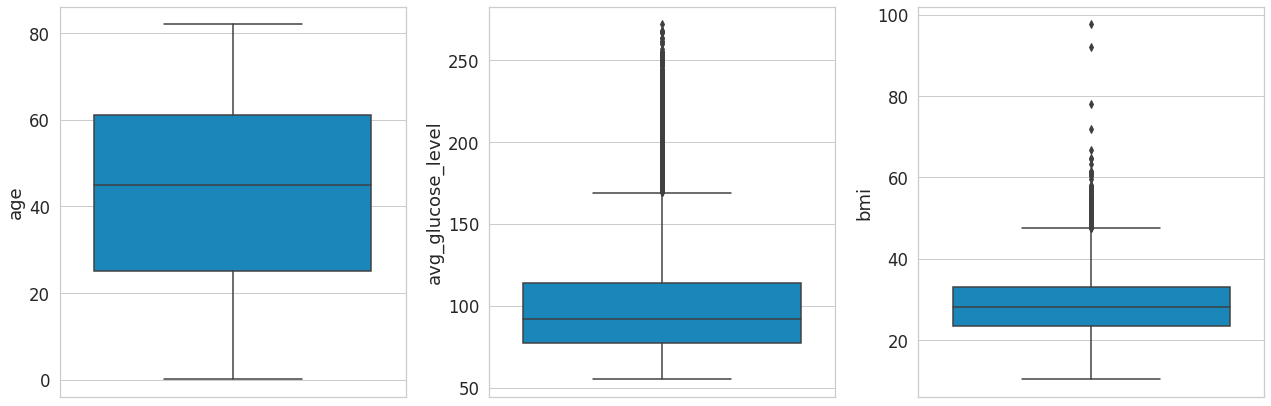

In [21]:
column_numerical = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize=(18,6))

for i, col in enumerate(column_numerical):
  sns.boxplot(data=data, y=col, ax=ax[i])

plt.tight_layout()
plt.show()

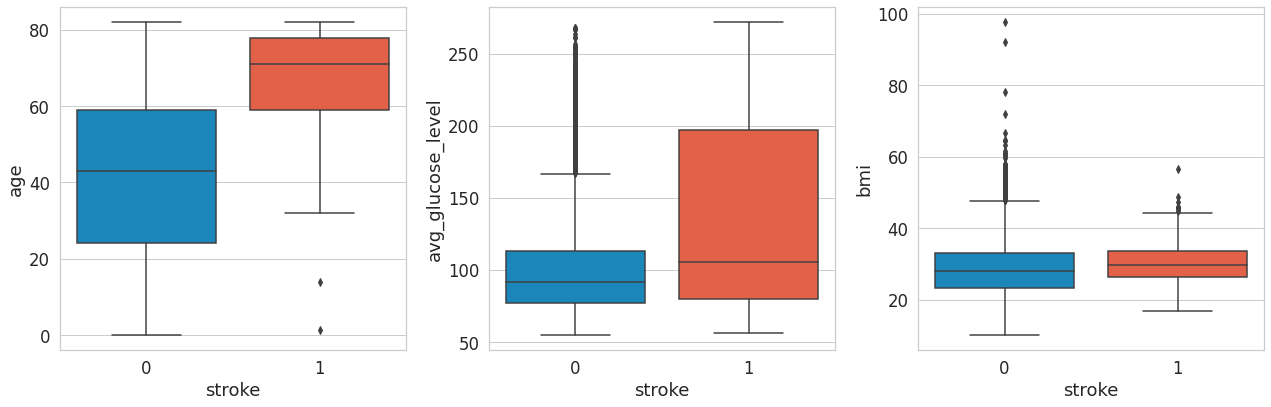

In [22]:
column_numerical = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize=(18,6))

for i, col in enumerate(column_numerical):
  sns.boxplot(data=data, x='stroke', y=col, ax=ax[i])

plt.tight_layout()
plt.show()

### Histogram

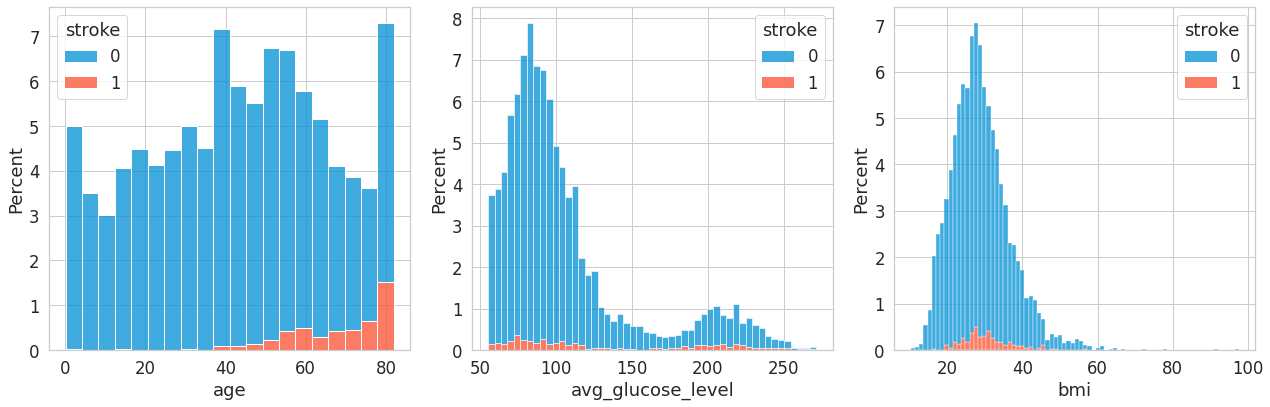

In [23]:
column_numerical = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize=(18,6))

for i, col in enumerate(column_numerical):
  sns.histplot(data=data, x=col, hue='stroke', multiple='stack', stat='percent', ax=ax[i])

plt.tight_layout()
plt.show()

### Violin Plot

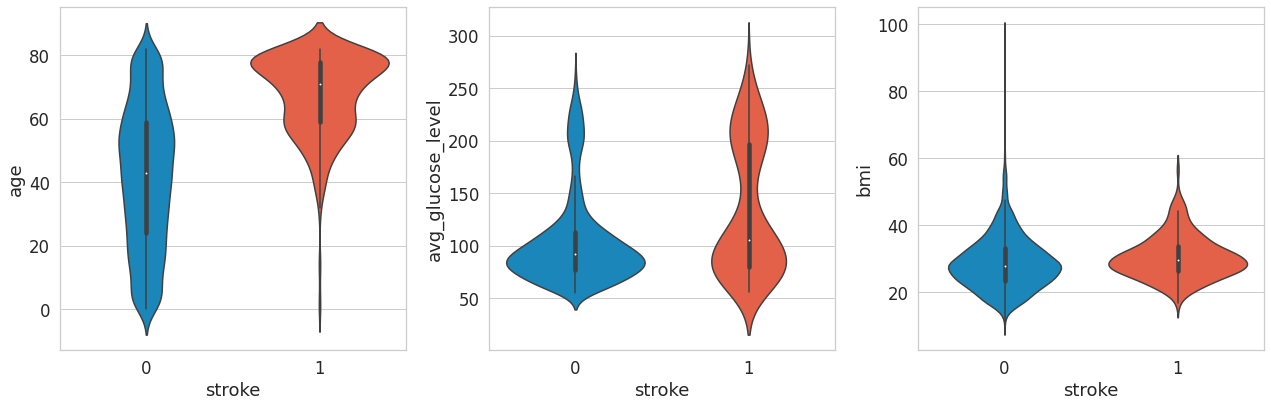

In [24]:
column_numerical = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize=(18,6))

for i, col in enumerate(column_numerical):
  sns.violinplot(data=data, x='stroke', y=col, ax=ax[i])

plt.tight_layout()
plt.show()

### Pair Plot

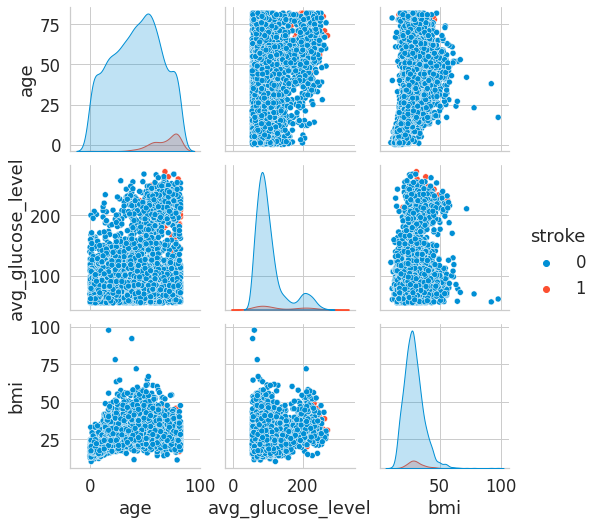

In [25]:
column_numerical = ['age', 'avg_glucose_level', 'bmi']

sns.pairplot(data, x_vars=column_numerical, y_vars=column_numerical, hue='stroke')

### Heatmap Correlation

In [26]:
column_numerical = ['age', 'avg_glucose_level', 'bmi']

corr_matrix = data[column_numerical].corr().round(3)

corr_matrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,age,avg_glucose_level,bmi
age,1.000000,0.238000,0.333000
avg_glucose_level,0.238000,1.000000,0.176000
bmi,0.333000,0.176000,1.000000


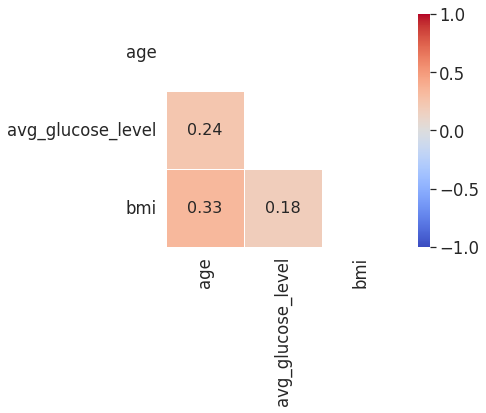

In [27]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', linewidth=1, mask=mask, 
            square=True, annot=True, annot_kws={'fontsize':16})

plt.show()

# Data Preprocessing

## Data Imputation
Since the `bmi` attribute has many outliers, I will use median to fill the missing values

In [28]:
data['bmi'].fillna(data['bmi'].median(), inplace=True)

data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

## Train - Test Split

In [29]:
data_X = data.drop('stroke', axis=1)
data_y = data['stroke']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=1, stratify=data_y)

I use the `stratify` parameter to make sure the proportion of the target variable on the train and the test subset is balanced.

In [31]:
y_train.value_counts()

0    3403
1     174
Name: stroke, dtype: int64

In [32]:
(round(174/3403,3), 174+3403)

(0.051, 3577)

In [33]:
y_test.value_counts()

0    1458
1      75
Name: stroke, dtype: int64

In [34]:
(round(75/1458,3), 75+1458)

(0.051, 1533)

Train set and test set have the same percentage of `stroke` class which is 5%.

## Feature Encoding

### Label Encoding
I use it for the target (label) variable.

In [35]:
le = LabelEncoder()

le.fit(y_train)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

### One Hot Encoding
Since this dataset is mixture of numeric and categorical data, I will encode the categorical data then take it to the original data. 
<br><br>
Alternatively, we can use ColumnTransformer, but I will not use it for now since it will change the entire code for 'introduction'.

In [36]:
column_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                      'work_type', 'residence_type', 'smoking_status']
                      
# ohe = OneHotEncoder(sparse=False, drop='first')
ohe = OneHotEncoder(sparse=False)

ohe.fit(X_train[column_categorical])

# for col in column_categorical:
X_train_ohe = ohe.transform(X_train[column_categorical])
X_test_ohe = ohe.transform(X_test[column_categorical])

# ohe.categories_
X_train_ohe

array([[0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.]])

In [37]:
column_ohe = ohe.get_feature_names_out(column_categorical)
column_ohe

array(['gender_Female', 'gender_Male', 'hypertension_0', 'hypertension_1',
       'heart_disease_0', 'heart_disease_1', 'ever_married_No',
       'ever_married_Yes', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed',
       'work_type_children', 'residence_type_Rural',
       'residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes'],
      dtype=object)

#### Train Set

In [38]:
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=column_ohe, index=X_train.index)
X_train_ohe_df.head()

,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Rural,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2882,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2422,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2664,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4287,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1315,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [39]:
X_train = pd.concat([X_train.drop(columns=column_categorical), X_train_ohe_df], axis=1)
X_train.head()

,age,avg_glucose_level,bmi,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Rural,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
2882,39.0,91.85,24.7,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2422,65.0,113.86,36.4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2664,47.0,95.04,28.7,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4287,33.0,77.94,28.7,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1315,55.0,82.81,44.3,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


#### Test Set

In [40]:
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=column_ohe, index=X_test.index)
X_test_ohe_df.head()

,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Rural,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3047,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4933,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1539,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3847,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3084,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [41]:
X_test = pd.concat([X_test.drop(columns=column_categorical), X_test_ohe_df], axis=1)
X_test.head()

,age,avg_glucose_level,bmi,gender_Female,gender_Male,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_No,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Rural,residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3047,22.0,62.52,38.2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4933,81.0,80.44,32.2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1539,30.0,91.23,28.1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3847,62.0,145.46,40.1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3084,55.0,112.46,27.3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Feature Scaling
Since this dataset is not in normal distribution, I will use min-max scaling for the numerical features.

In [42]:
column_numerical = ['age', 'avg_glucose_level', 'bmi']

for i in column_numerical:
  scaler = MinMaxScaler()
  scaler.fit(X_train[[i]])

  X_train[[i]] = scaler.transform(X_train[[i]])
  X_test[[i]] = scaler.transform(X_test[[i]])

In [43]:
X_train_scale = X_train.copy()
X_test_scale = X_test.copy()

data_scale = pd.concat([X_train_scale, X_test_scale], axis=0)
data_scale = data_scale.join(pd.Series(y_train, name='stroke', index=X_train_scale.index), lsuffix='_1', rsuffix='_2')
data_scale = data_scale.join(pd.Series(y_test, name='stroke', index=X_test_scale.index), lsuffix='_1', rsuffix='_2')

data_scale['stroke_1'].fillna(data_scale['stroke_2'], inplace=True)
data_scale.drop(columns='stroke_2', inplace=True)
data_scale.rename(columns={'stroke_1':'stroke'}, inplace=True)

# renaming the column, for better viz
data_scale_col = list(data_scale.columns)

for i, col in enumerate(data_scale_col):
  data_scale_col[i] = inflection.underscore(data_scale_col[i])

data_scale.columns = data_scale_col

data_scale.head()

,age,avg_glucose_level,bmi,gender_female,gender_male,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_no,...,work_type_never_worked,work_type_private,work_type_self_employed,work_type_children,residence_type_rural,residence_type_urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
2882,0.475098,0.172733,0.163975,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2422,0.792480,0.276242,0.309317,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2664,0.572754,0.187735,0.213665,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4287,0.401855,0.107318,0.213665,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1315,0.670410,0.130220,0.407453,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Heatmap Correlation

In [44]:
corr_matrix = data_scale.corr().round(3)

corr_matrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,age,avg_glucose_level,bmi,gender_female,gender_male,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,ever_married_no,ever_married_yes,work_type_govt_job,work_type_never_worked,work_type_private,work_type_self_employed,work_type_children,residence_type_rural,residence_type_urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
age,1.000000,0.238000,0.324000,0.028000,-0.028000,-0.276000,0.276000,-0.264000,0.264000,-0.679000,0.679000,0.130000,-0.079000,0.117000,0.328000,-0.634000,-0.014000,0.014000,0.256000,-0.265000,0.073000,0.245000
avg_glucose_level,0.238000,1.000000,0.167000,-0.055000,0.055000,-0.174000,0.174000,-0.162000,0.162000,-0.155000,0.155000,0.014000,-0.015000,0.017000,0.063000,-0.102000,0.005000,-0.005000,0.077000,-0.076000,0.018000,0.132000
bmi,0.324000,0.167000,1.000000,0.026000,-0.026000,-0.158000,0.158000,-0.037000,0.037000,-0.335000,0.335000,0.078000,-0.028000,0.204000,0.070000,-0.442000,0.000000,-0.000000,0.101000,-0.147000,0.084000,0.036000
gender_female,0.028000,-0.055000,0.026000,1.000000,-1.000000,0.021000,-0.021000,0.086000,-0.086000,-0.030000,0.030000,0.017000,-0.011000,0.033000,0.026000,-0.089000,-0.006000,0.006000,-0.045000,0.045000,-0.011000,-0.009000
gender_male,-0.028000,0.055000,-0.026000,-1.000000,1.000000,-0.021000,0.021000,-0.086000,0.086000,0.030000,-0.030000,-0.017000,0.011000,-0.033000,-0.026000,0.089000,0.006000,-0.006000,0.045000,-0.045000,0.011000,0.009000
hypertension_0,-0.276000,-0.174000,-0.158000,0.021000,-0.021000,1.000000,-1.000000,0.108000,-0.108000,0.164000,-0.164000,-0.018000,0.022000,0.005000,-0.115000,0.130000,-0.008000,0.008000,-0.057000,0.070000,-0.031000,-0.128000
hypertension_1,0.276000,0.174000,0.158000,-0.021000,0.021000,-1.000000,1.000000,-0.108000,0.108000,-0.164000,0.164000,0.018000,-0.022000,-0.005000,0.115000,-0.130000,0.008000,-0.008000,0.057000,-0.070000,0.031000,0.128000
heart_disease_0,-0.264000,-0.162000,-0.037000,0.086000,-0.086000,0.108000,-0.108000,1.000000,-1.000000,0.115000,-0.115000,-0.001000,0.016000,-0.000000,-0.087000,0.092000,0.003000,-0.003000,-0.078000,0.097000,-0.044000,-0.135000
heart_disease_1,0.264000,0.162000,0.037000,-0.086000,0.086000,-0.108000,0.108000,-1.000000,1.000000,-0.115000,0.115000,0.001000,-0.016000,0.000000,0.087000,-0.092000,-0.003000,0.003000,0.078000,-0.097000,0.044000,0.135000
ever_married_no,-0.679000,-0.155000,-0.335000,-0.030000,0.030000,0.164000,-0.164000,0.115000,-0.115000,1.000000,-1.000000,-0.134000,0.091000,-0.154000,-0.193000,0.544000,0.006000,-0.006000,-0.177000,0.225000,-0.105000,-0.108000


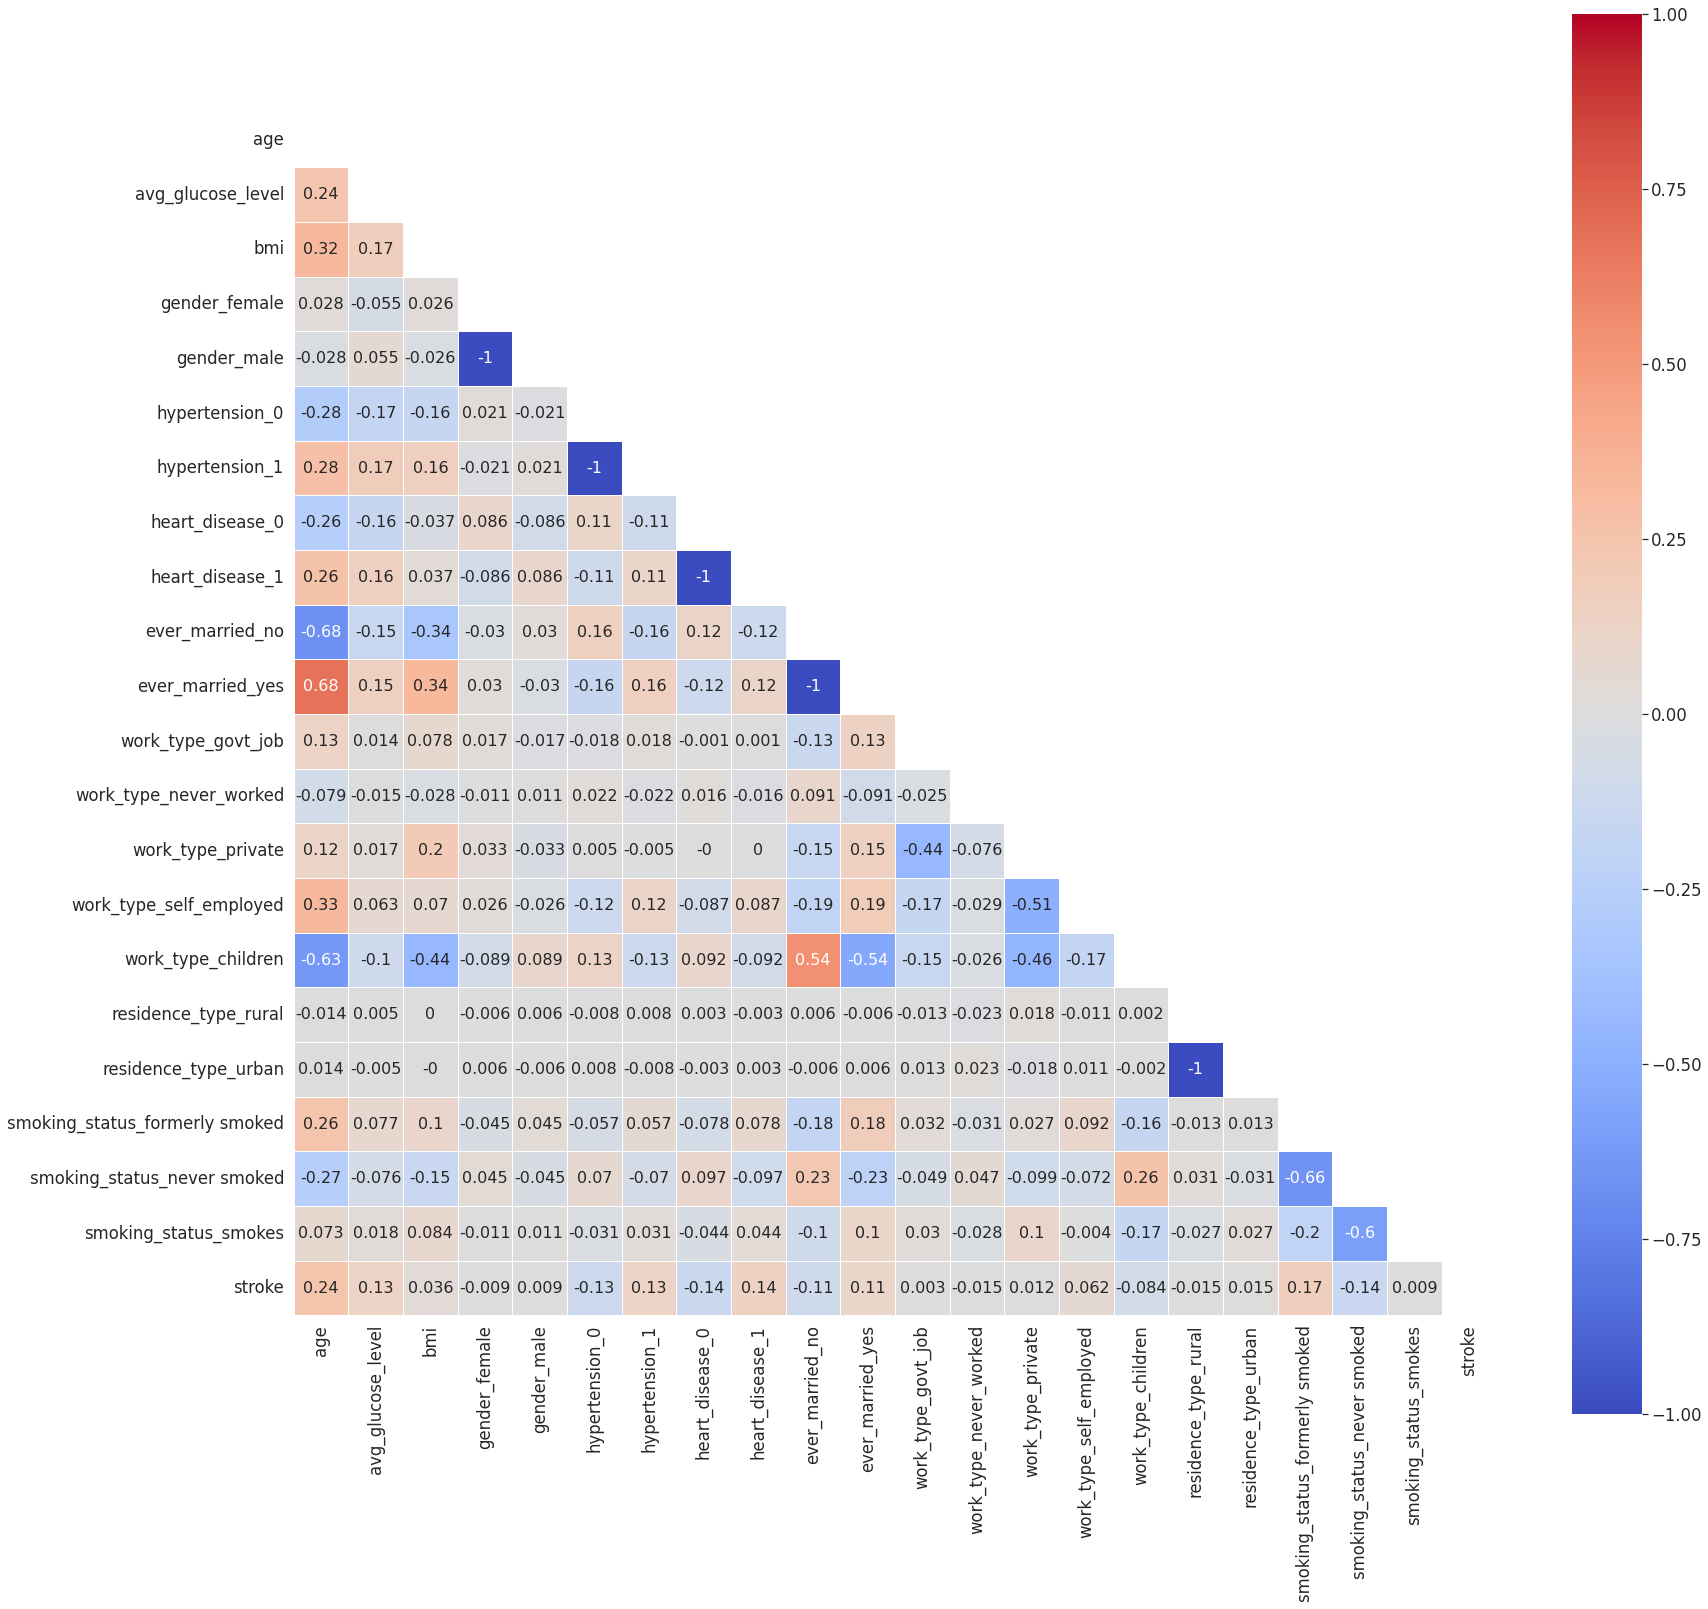

In [45]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(24,24))
sns.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', linewidth=1, mask=mask, 
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)

plt.show()

From these correlation plots, we can see that there are some perfect multicollinearities. Multicollinearity is a condition where some independent variables are highly correlated to each other. A perfect correlation is a condition when two independent variables have a +1.0 or -1.0 correlation. The perfect correlation between independent variables can lead to a singularity.
<br><br>
The simplest way to solve this problem is dropping 1 column when doing one-hot encoding.
<br><br>
Jessica Miles had written some good explanations about multicollinearity and the effect of dropping a column from the encoded data. You can read [here](https://towardsdatascience.com/drop-first-can-hurt-your-ols-regression-models-interpretability-4ca529cfb707).

## Removing Multicollinearity

In [46]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3, random_state=1, stratify=data_y)

# ==============================
# label encoding
le = LabelEncoder()

le.fit(y_train)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

# ==============================
# one hot encoding
column_categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
                      'work_type', 'residence_type', 'smoking_status']
                      
ohe = OneHotEncoder(sparse=False, drop='first')

ohe.fit(X_train[column_categorical])

# for col in column_categorical:
X_train_ohe = ohe.transform(X_train[column_categorical])
X_test_ohe = ohe.transform(X_test[column_categorical])

column_ohe = ohe.get_feature_names_out(column_categorical)

# encoding the X train
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=column_ohe, index=X_train.index)
X_train = pd.concat([X_train.drop(columns=column_categorical), X_train_ohe_df], axis=1)

# encoding the X test
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=column_ohe, index=X_test.index)
X_test = pd.concat([X_test.drop(columns=column_categorical), X_test_ohe_df], axis=1)

# ==============================
# feature scaling
column_numerical = ['age', 'avg_glucose_level', 'bmi']

for i in column_numerical:
  scaler = MinMaxScaler()
  scaler.fit(X_train[[i]])

  X_train[[i]] = scaler.transform(X_train[[i]])
  X_test[[i]] = scaler.transform(X_test[[i]])

# ==============================
# scaled dataframe, just for viz
X_train_scale = X_train.copy()
X_test_scale = X_test.copy()

data_scale = pd.concat([X_train_scale, X_test_scale], axis=0)
# data_scale = pd.concat([data_scale, pd.Series(y_train, name='stroke', index=X_train_scale.index)], axis=1)
# data_scale = pd.concat([data_scale, pd.Series(y_test, name='stroke', index=X_test_scale.index)], axis=1)
data_scale = data_scale.join(pd.Series(y_train, name='stroke', index=X_train_scale.index), lsuffix='_1', rsuffix='_2')
data_scale = data_scale.join(pd.Series(y_test, name='stroke', index=X_test_scale.index), lsuffix='_1', rsuffix='_2')

data_scale['stroke_1'].fillna(data_scale['stroke_2'], inplace=True)
data_scale.drop(columns='stroke_2', inplace=True)
data_scale.rename(columns={'stroke_1':'stroke'}, inplace=True)

# renaming the column, for better viz
data_scale_col = list(data_scale.columns)

for i, col in enumerate(data_scale_col):
  data_scale_col[i] = inflection.underscore(data_scale_col[i])

data_scale.columns = data_scale_col

In [47]:
corr_matrix = data_scale.corr().round(3)

corr_matrix.style.background_gradient(cmap='coolwarm', vmin=-1, vmax=1)

,age,avg_glucose_level,bmi,gender_male,hypertension_1,heart_disease_1,ever_married_yes,work_type_never_worked,work_type_private,work_type_self_employed,work_type_children,residence_type_urban,smoking_status_never smoked,smoking_status_smokes,stroke
age,1.000000,0.238000,0.324000,-0.028000,0.276000,0.264000,0.679000,-0.079000,0.117000,0.328000,-0.634000,0.014000,-0.265000,0.073000,0.245000
avg_glucose_level,0.238000,1.000000,0.167000,0.055000,0.174000,0.162000,0.155000,-0.015000,0.017000,0.063000,-0.102000,-0.005000,-0.076000,0.018000,0.132000
bmi,0.324000,0.167000,1.000000,-0.026000,0.158000,0.037000,0.335000,-0.028000,0.204000,0.070000,-0.442000,-0.000000,-0.147000,0.084000,0.036000
gender_male,-0.028000,0.055000,-0.026000,1.000000,0.021000,0.086000,-0.030000,0.011000,-0.033000,-0.026000,0.089000,-0.006000,-0.045000,0.011000,0.009000
hypertension_1,0.276000,0.174000,0.158000,0.021000,1.000000,0.108000,0.164000,-0.022000,-0.005000,0.115000,-0.130000,-0.008000,-0.070000,0.031000,0.128000
heart_disease_1,0.264000,0.162000,0.037000,0.086000,0.108000,1.000000,0.115000,-0.016000,0.000000,0.087000,-0.092000,0.003000,-0.097000,0.044000,0.135000
ever_married_yes,0.679000,0.155000,0.335000,-0.030000,0.164000,0.115000,1.000000,-0.091000,0.154000,0.193000,-0.544000,0.006000,-0.225000,0.105000,0.108000
work_type_never_worked,-0.079000,-0.015000,-0.028000,0.011000,-0.022000,-0.016000,-0.091000,1.000000,-0.076000,-0.029000,-0.026000,0.023000,0.047000,-0.028000,-0.015000
work_type_private,0.117000,0.017000,0.204000,-0.033000,-0.005000,0.000000,0.154000,-0.076000,1.000000,-0.505000,-0.456000,-0.018000,-0.099000,0.100000,0.012000
work_type_self_employed,0.328000,0.063000,0.070000,-0.026000,0.115000,0.087000,0.193000,-0.029000,-0.505000,1.000000,-0.172000,0.011000,-0.072000,-0.004000,0.062000


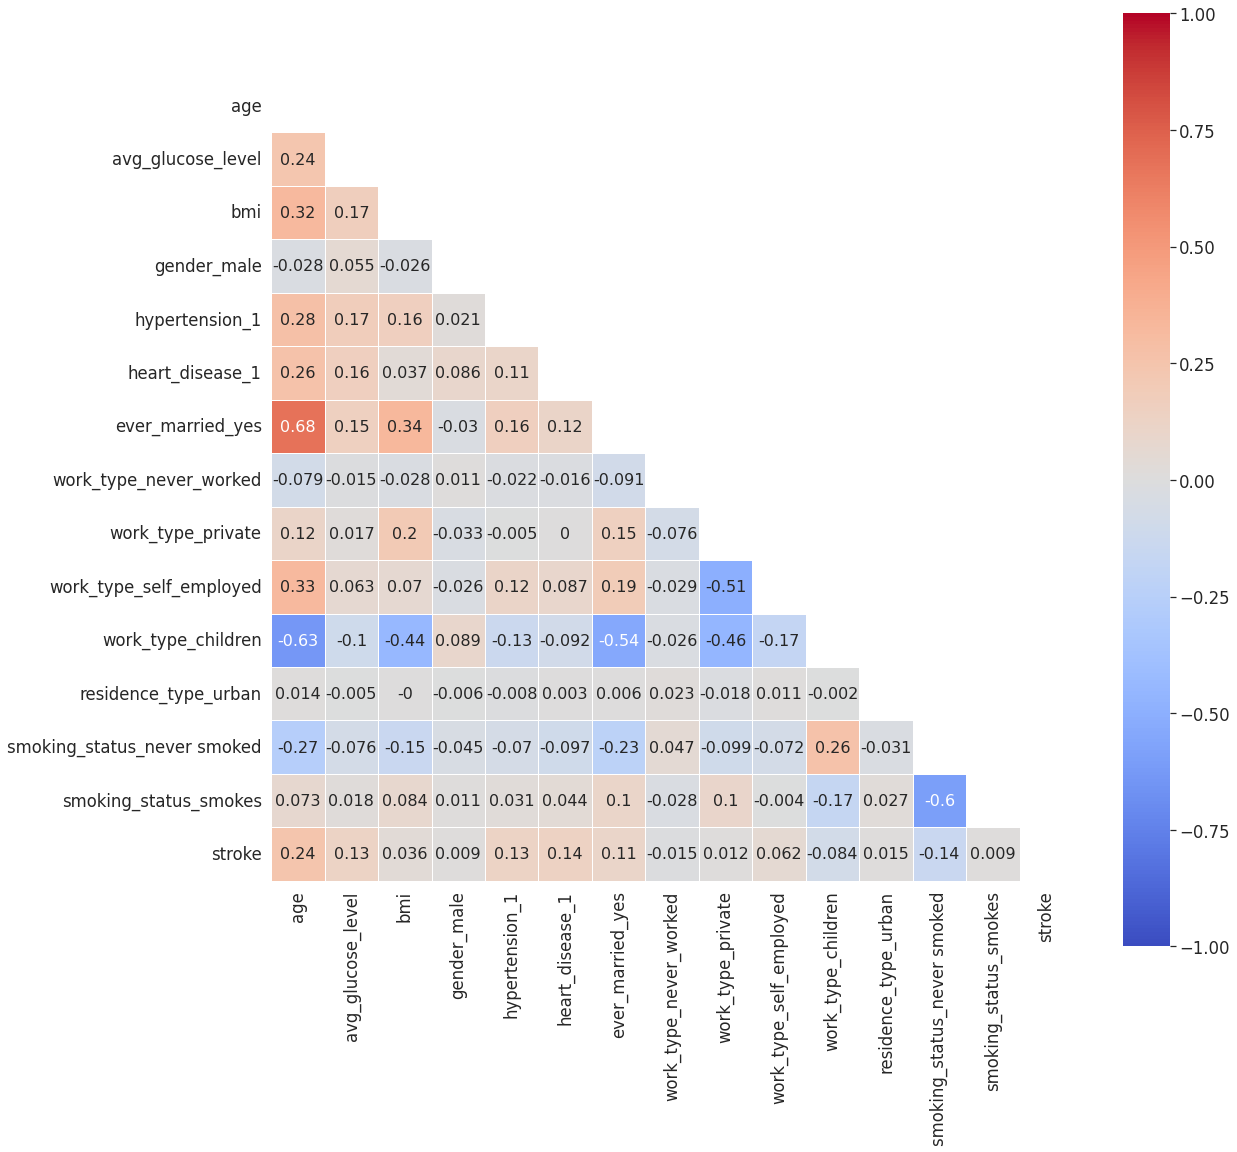

In [48]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(corr_matrix, vmin=-1, vmax=1,
            cmap='coolwarm', linewidth=1, mask=mask, 
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)

plt.show()

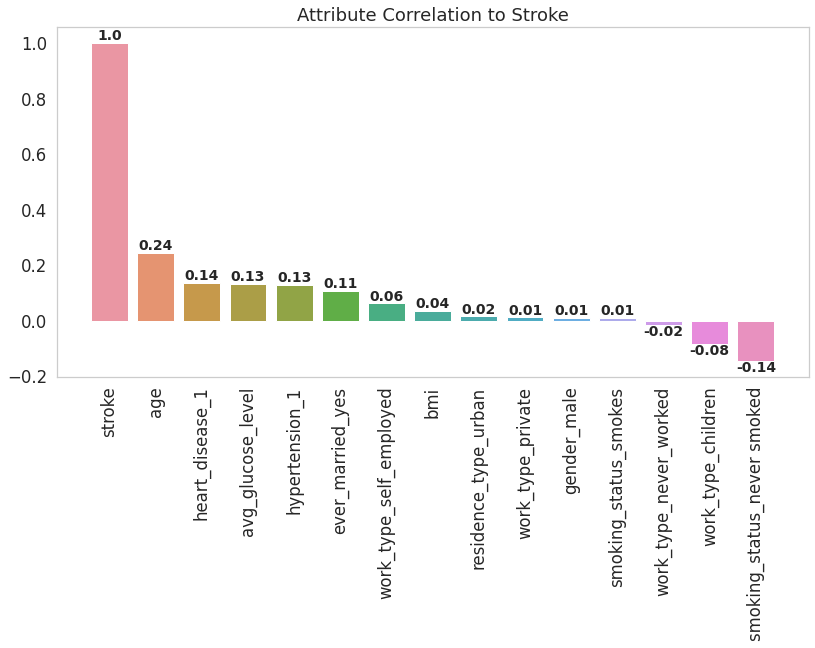

In [49]:
corr_matrix = data_scale.corr().round(3)
corr_target = corr_matrix['stroke'].sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(x=corr_target.index, y=corr_target.values, ax=ax)

ax.grid(False)
ax.set_title('Attribute Correlation to Stroke')
plt.setp(ax.get_xticklabels(), rotation=90)

for n, x in enumerate(corr_target.index):
  if corr_target[n] >= 0:
    ax.text(x=n, y=corr_target[n], s=corr_target[n].round(2),
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=14, fontweight='bold')
  else:
    ax.text(x=n, y=corr_target[n], s=corr_target[n].round(2),
            horizontalalignment='center', verticalalignment='top',
            fontsize=14, fontweight='semibold')

ax.axis('tight')

plt.show()

## SMOTE
**REMEMBER**: Use SMOTE (or any other sampling method) only for the training set.

In [50]:
smote = SMOTE(random_state=0)

X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [51]:
pd.Series(y_train).value_counts()

0    3403
1     174
dtype: int64

In [52]:
pd.Series(y_train_res).value_counts()

0    3403
1    3403
dtype: int64

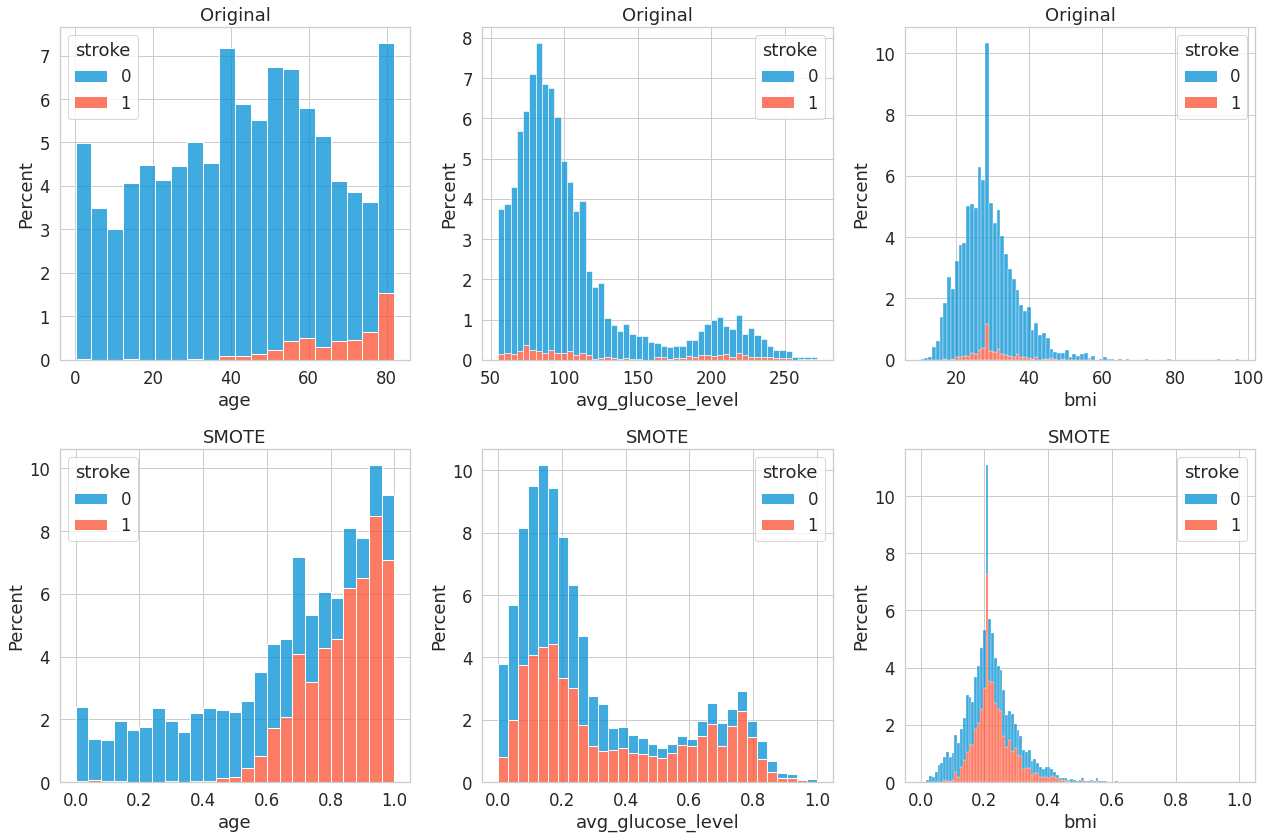

In [53]:
X_train_res_df = pd.DataFrame(X_train_res, columns=X_train_res.columns)
y_train_res_df = pd.DataFrame(y_train_res, columns=['stroke'])

data_resampled = pd.concat([X_train_res_df, y_train_res_df], axis=1)

column_numerical = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(2, 3, figsize=(18,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_numerical):
  sns.histplot(data=data, x=col, hue='stroke', multiple='stack', stat='percent', ax=axes_list[i])
  axes_list[i].set_title('Original')

for i, col in enumerate(column_numerical):
  sns.histplot(data=data_resampled, x=col, hue='stroke', multiple='stack', stat='percent', ax=axes_list[i+3])
  axes_list[i+3].set_title('SMOTE')

plt.tight_layout()
plt.show()

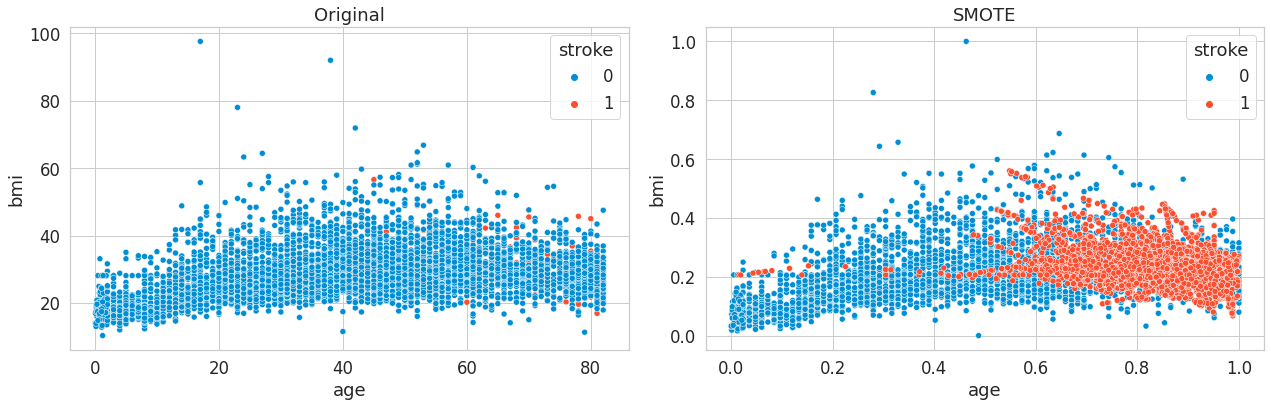

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))

sns.scatterplot(data=data, x='age', y='bmi', hue='stroke', ax=ax[0])
ax[0].set_title('Original')

sns.scatterplot(data=data_resampled, x='age', y='bmi', hue='stroke', ax=ax[1])
ax[1].set_title('SMOTE')

plt.tight_layout()
plt.show()

## ADASYN
**REMEMBER**: Use ADASYN (or any other sampling method) only for the training set.

In [55]:
adasyn = ADASYN(random_state=0)

X_train_res, y_train_res = adasyn.fit_resample(X_train, y_train)

In [56]:
pd.Series(y_train).value_counts()

0    3403
1     174
dtype: int64

In [57]:
pd.Series(y_train_res).value_counts()

0    3403
1    3382
dtype: int64

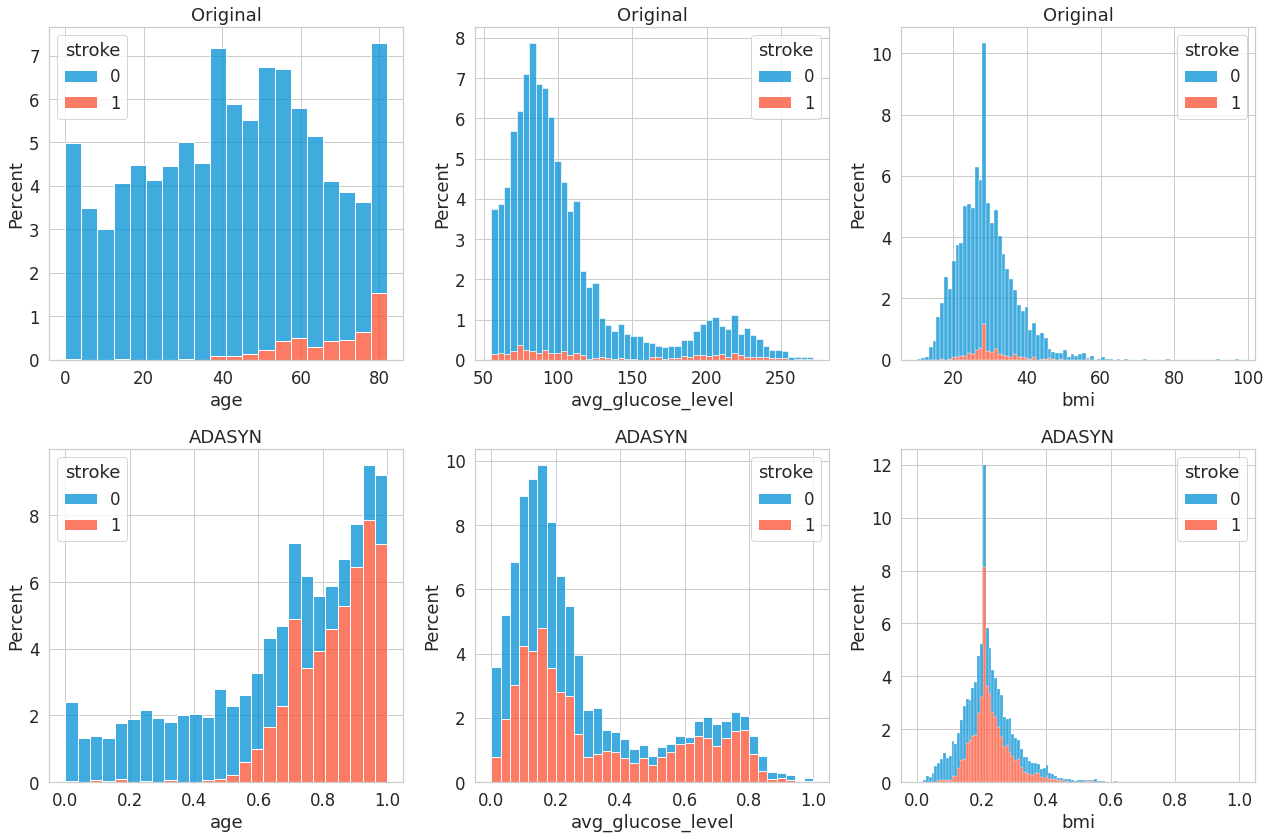

In [58]:
X_train_res_df = pd.DataFrame(X_train_res, columns=X_train_res.columns)
y_train_res_df = pd.DataFrame(y_train_res, columns=['stroke'])

data_resampled = pd.concat([X_train_res_df, y_train_res_df], axis=1)

column_numerical = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(2, 3, figsize=(18,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_numerical):
  sns.histplot(data=data, x=col, hue='stroke', multiple='stack', stat='percent', ax=axes_list[i])
  axes_list[i].set_title('Original')

for i, col in enumerate(column_numerical):
  sns.histplot(data=data_resampled, x=col, hue='stroke', multiple='stack', stat='percent', ax=axes_list[i+3])
  axes_list[i+3].set_title('ADASYN')

plt.tight_layout()
plt.show()

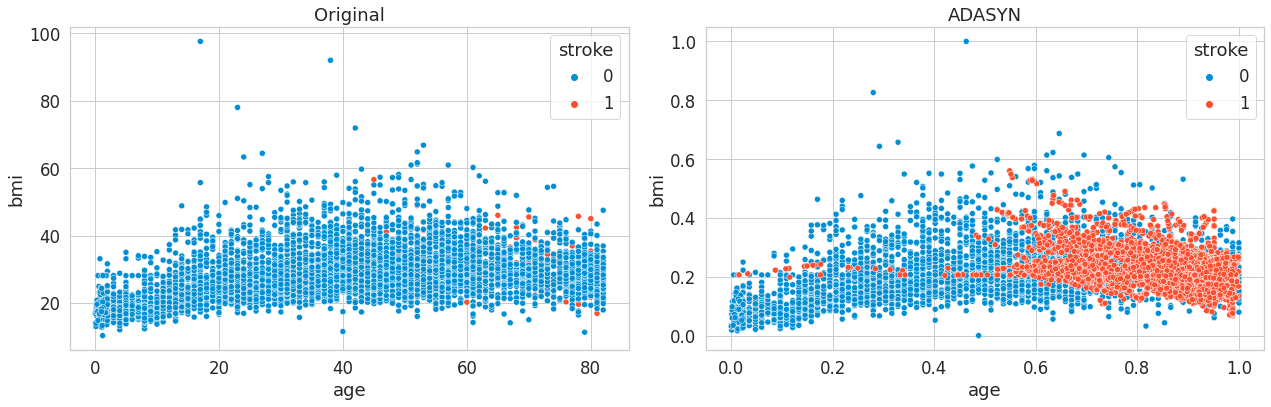

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))

sns.scatterplot(data=data, x='age', y='bmi', hue='stroke', ax=ax[0])
ax[0].set_title('Original')

sns.scatterplot(data=data_resampled, x='age', y='bmi', hue='stroke', ax=ax[1])
ax[1].set_title('ADASYN')

plt.tight_layout()
plt.show()

I will be using ADASYN for this project. I have tested using SMOTE and ADASYN but the model performance is the same.

# Logistic Regression

## Building Model

In [60]:
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

LogisticRegression()

## Predicting

In [61]:
y_pred = model.predict(X_test)

## Model Evaluation

### Classification Report

In [62]:
print(classification_report(y_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.985     0.755     0.855      1458
           1      0.140     0.773     0.237        75

    accuracy                          0.756      1533
   macro avg      0.562     0.764     0.546      1533
weighted avg      0.943     0.756     0.825      1533



In [63]:
print('Accuracy\t: ', round(accuracy_score(y_test, y_pred),3))
print('Precision\t: ', round(precision_score(y_test, y_pred, average='macro'),3)) 
print('Recall\t\t: ', round(recall_score(y_test, y_pred, average='macro'),3))

Accuracy	:  0.756
Precision	:  0.562
Recall		:  0.764


### Confusion Matrix

In [64]:
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm)
df_cm.rename(columns={0:'Not Stroke', 1:'Stroke'}, index={0:'Not Stroke', 1:'Stroke'}, inplace=True)
df_cm

,Not Stroke,Stroke
Not Stroke,1101,357
Stroke,17,58


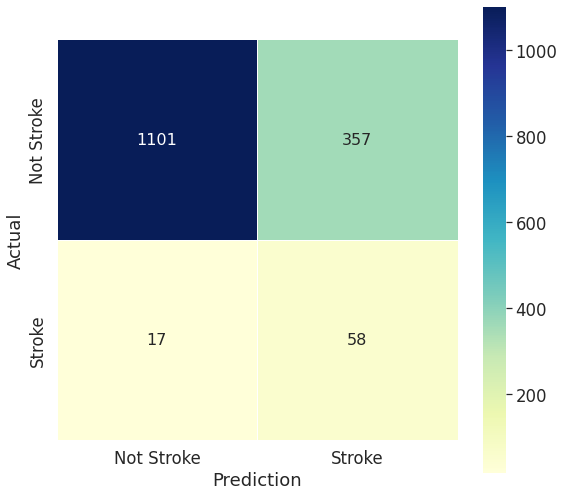

In [65]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_cm, fmt='.0f',
            cmap='YlGnBu', linewidth=1,
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
plt.show()

# Conclusion
**Conclusions**
- Using the oversampling method, I can get similar true positive rate (TPR) and true negative rate (TNR) values
- The accuracy is not really high, it's just about 75%. But, getting high TPR is more preferred
- I've tried not using the oversampling method, and get 95% accuracy but it only has ~1% TPR. It will lead to a fatal prediction because we can't identify someone who actually has a stroke

**Problems**
- The precision is very low

**Future Works**
- Improving the model or using another method